## Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [16]:
data = np.load("set_3/raw/anti_5.npz", allow_pickle=True)
train = data["train"]
train.shape

(8569, 3)

In [77]:
train= train[0:8100]
train.shape
np.savez("preprocessed_anticlock_2.npz", train)

(8153, 3)

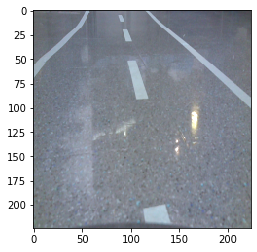

In [71]:
sample_1 = train[0][0]
plt.imshow(sample_1,cmap='gray')

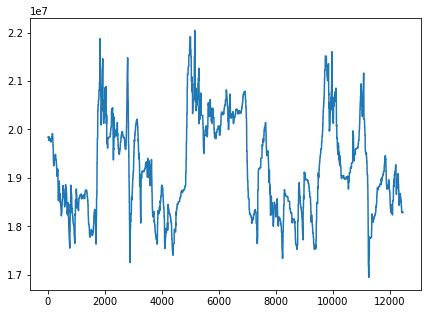

In [72]:
data = []
index = [val for val in range(len(train))]
for val in train:
    sum_d = np.sum(val[0])
    data.append(sum_d)
    
plt.figure(figsize=(7,5)) 
plt.plot(index, data)

In [21]:
sample_streeing = train[5000][2]
print(sample_streeing)

0.5050000000000002


## Compile data for acceptable format

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from skimage import color

## Set_1

#### Extract data

In [99]:
all_data.shape

(118955, 3)

In [44]:
data_1=np.load("set_1/set_1/preprocessed/preprocessed_clock_1.npz",allow_pickle=True)
data_2=np.load("set_1/set_1/preprocessed/preprocessed_clock_2.npz",allow_pickle=True)
data_3=np.load("set_1/set_1/preprocessed/preprocessed_anticlock_1.npz",allow_pickle=True)
data_4=np.load("set_1/set_1/preprocessed/preprocessed_anticlock_2.npz",allow_pickle=True)
train_1=data_1["arr_0"]
train_2=data_2["arr_0"]
train_3=data_3["arr_0"]
train_4=data_4["arr_0"]
print(train_1.shape)
print(train_2.shape)
print(train_3.shape)
print(train_4.shape)
all_data=np.concatenate((train_1,train_2, train_3, train_4), axis = 0)
np.random.shuffle(all_data)
train,test = all_data[0:int(all_data.shape[0]*0.80)],all_data[int(all_data.shape[0]*0.80):all_data.shape[0]]

(12471, 3)
(11390, 3)
(10106, 3)
(9907, 3)
(8271, 3)


In [47]:
len(all_data)

45034

In [48]:
np.savez("set_3/preprocessed/preprocessed_clock.npz", all_data)

[]

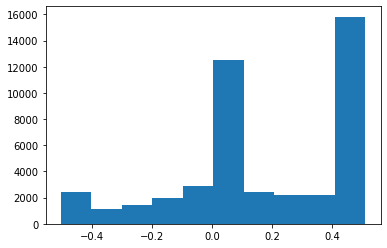

In [35]:
# all_data[1500][2]
lis=[]
for val in range(len(all_data)):
    lis.append(all_data[val][2])
plt.hist(lis,bins=10)
plt.plot()

45034

#### Single sample visualization

In [ ]:
sample=torch.tensor(color.rgb2gray(train[0][0]))
plt.figure(figsize=(3,3))
plt.imshow(sample,cmap='gray')
img_shape=sample.shape

#### Compile to tensor format

In [4]:
train_data=[]
test_data=[]
for val in train:
    gray=torch.tensor(color.rgb2gray(val[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val[2]))
    train_data.append(tup)
    
for val_1 in test:
    gray=torch.tensor(color.rgb2gray(val_1[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val_1[2]))
    test_data.append(tup)

In [5]:
torch.save(train_data, 'set_1_train.pt')
torch.save(test_data, 'set_1_test.pt')

## Set_2

In [2]:
import glob
ct=0
all_data=np.array([])
for np_name in glob.glob('set_3/raw/*.npz'):
    data_1=np.load(np_name,allow_pickle=True)
    train_1=data_1["train"]
    if ct==0:
        all_data=train_1
    else:
        all_data=np.concatenate((all_data,train_1), axis = 0)
    ct+=1

In [3]:
np.random.shuffle(all_data)
np.savez("set_3_all_data.npz",data=all_data)

In [46]:
data=np.load("set_3_all_data.npz",allow_pickle=True)
train=data["data"]
train = train[0:int(train.shape[0]*0.20)]

In [114]:
# trainall_data[0:int(all_data.shape[0]*0.45)]


# ,all_data[int(all_data.shape[0]*0.45):int(all_data.shape[0]*0.90)],all_data[int(all_data.shape[0]*0.90):all_data.shape[0]]
# all_data[int(all_data.shape[0]*0.20):int(all_data.shape[0]*0.40)],
# all_data[int(all_data.shape[0]*0.40):int(all_data.shape[0]*0.60)],

In [47]:
data=[]
for val in train:
    gray=torch.tensor(color.rgb2gray(val[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val[2]))
    data.append(tup)
torch.save(data, 'set_3/.pt/set_3_train_1.pt')

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Set_3

In [ ]:
data_1=np.load("set_3/raw/clock_1.npz",allow_pickle=True)
data_2=np.load("set_3/raw/clock_2.npz",allow_pickle=True)
data_3=np.load("set_3/raw/clock_3.npz",allow_pickle=True)
data_4=np.load("set_3/raw/clock_4.npz",allow_pickle=True)
data_5=np.load("set_3/raw/clock_5.npz",allow_pickle=True)
train_1=data_1["train"]
train_2=data_2["train"]
train_3=data_3["train"]
train_4=data_4["train"]
train_5=data_5["train"]
print(train_1.shape)
print(train_2.shape)
print(train_3.shape)
print(train_4.shape)
print(train_5.shape)
all_data=np.concatenate((train_1,train_2, train_3, train_4,train_5), axis = 0)
np.random.shuffle(all_data)
# np.savez("set_3/preprocessed/preprocessed_anti.npz", all_data)
# train,test = all_data[0:int(all_data.shape[0]*0.80)],all_data[int(all_data.shape[0]*0.80):all_data.shape[0]]

In [ ]:
np.savez("set_3/preprocessed/preprocessed_clock.npz", all_data)

In [3]:
data_1=np.load("set_3/preprocessed/preprocessed_anti.npz",allow_pickle=True)
data_2=np.load("set_3/preprocessed/preprocessed_clock.npz",allow_pickle=True)
train_1=data_1["arr_0"]
train_2=data_2["arr_0"]

In [4]:
all_data=np.concatenate((train_1,train_2), axis = 0)

#### Balancing data

(array([29773.,  2694.,  3481.,  3962.,  4091., 22404.,  2674.,  2621.,
         2317., 16051.]),
 array([-0.51 , -0.408, -0.306, -0.204, -0.102,  0.   ,  0.102,  0.204,
         0.306,  0.408,  0.51 ]),
 <a list of 10 Patch objects>)

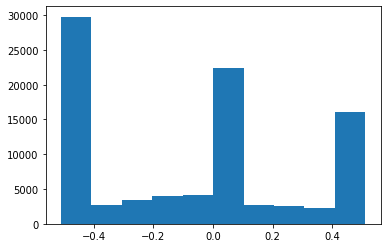

In [5]:
lis=[]
for val in range(len(all_data)):
    lis.append(all_data[val][2])
abc=plt.hist(lis,bins=10)
abc

In [6]:
bin_1=[]
bin_2=[]
bin_3=[]
for val in range(len(all_data)):
    if all_data[val][2]<-0.4:
        bin_1.append(all_data[val])
    elif all_data[val][2]>0.4:
        bin_3.append(all_data[val])
    else:
        bin_2.append(all_data[val])   

In [9]:
print(len(bin_1))
print(len(bin_3))
print(len(bin_2))
import random

16183
16183
43928


In [10]:
bin_1=bin_1[0:16183]
random.shuffle(bin_2)
bin_2=bin_2[0:26000]

In [11]:
print(len(bin_1))
print(len(bin_3))
print(len(bin_2))

16183
16183
26000


In [12]:
all_data=np.concatenate((bin_1,bin_2,bin_3), axis = 0)

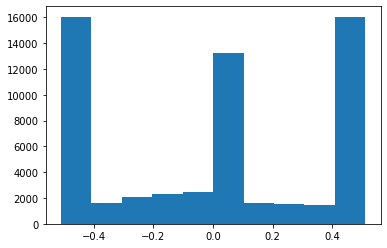

In [13]:
lis=[]
for val in range(len(all_data)):
    lis.append(all_data[val][2])
plt.hist(lis,bins=10)
plt.show()

In [14]:
np.savez("set_3/preprocessed/preprocessed_all_data.npz", all_data)

In [3]:
all_data=np.load("set_3/preprocessed/preprocessed_all_data.npz",allow_pickle=True)
all_data=all_data["arr_0"]

In [4]:
np.random.shuffle(all_data)

In [8]:
train_data=[]
test_data=[]
test=all_data[int(all_data.shape[0]*0.90):all_data.shape[0]]
# train=all_data[0:int(all_data.shape[0]*0.90)]

In [9]:
train_data=[]
test_data=[]
# for val in train:
#     gray=torch.tensor(color.rgb2gray(val[0])).unsqueeze(1)
#     tup=(gray,torch.tensor(val[2]))
#     train_data.append(tup)
    
for val_1 in test:
    gray=torch.tensor(color.rgb2gray(val_1[0])).unsqueeze(1)
    tup=(gray,torch.tensor(val_1[2]))
    test_data.append(tup)

In [10]:
# torch.save(train_data, 'set_3/pt/new/set_3_train.pt')
torch.save(test_data, 'set_3/pt/new/set_3_test.pt')